### Business Objective

This given data is about Bakery . We have to identify the most frequent item from the 21293 transactions given in data . We have to see the association rules with the support , confidence and the lift . 

In [1]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


##### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules

### Load and viwe data

In [3]:
df = pd.read_csv('bakery.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df.tail()

,Date,Time,Transaction,Item
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [7]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,21293,159,2017-02-04,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,21293,8240,12:07:39,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction,21293.0,NaN,NaN,NaN,4951.990889,2787.7584,1.0,2548.0,5067.0,7329.0,9684.0
Item,21293,95,Coffee,5471,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.Transaction.value_counts()

6474    12
6279    11
6716    11
6412    11
6045    10
        ..
4586     1
4585     1
4584     1
4582     1
9684     1
Name: Transaction, Length: 9531, dtype: int64

It is a clean data as there are no missing values. As we can see there are multiple transaction made by the customers.
We can see there are 95 unique items and most of the customers go for coffee in the frequency of 5471 . 

In [12]:
df[df.Transaction==6474].sort_values("Date")

,Date,Time,Transaction,Item
13833,2017-02-12,14:35:34,6474,Coffee
13834,2017-02-12,14:35:34,6474,Coffee
13835,2017-02-12,14:35:34,6474,Coffee
13836,2017-02-12,14:35:34,6474,Tea
13837,2017-02-12,14:35:34,6474,Toast
13838,2017-02-12,14:35:34,6474,Duck egg
13839,2017-02-12,14:35:34,6474,Extra Salami or Feta
13840,2017-02-12,14:35:34,6474,Chicken Stew
13841,2017-02-12,14:35:34,6474,NONE
13842,2017-02-12,14:35:34,6474,Cookies


In [13]:
df[df.Transaction==6279].sort_values("Date")

,Date,Time,Transaction,Item
13356,2017-02-09,13:44:56,6279,Juice
13357,2017-02-09,13:44:56,6279,Toast
13358,2017-02-09,13:44:56,6279,Sandwich
13359,2017-02-09,13:44:56,6279,Sandwich
13360,2017-02-09,13:44:56,6279,Tea
13361,2017-02-09,13:44:56,6279,Coffee
13362,2017-02-09,13:44:56,6279,Cookies
13363,2017-02-09,13:44:56,6279,Cookies
13364,2017-02-09,13:44:56,6279,Alfajores
13365,2017-02-09,13:44:56,6279,Alfajores


In [15]:
df.groupby(['Transaction','Date']).ngroups

9531

Out of 21293 observations , we will use 9531 transactions for association rule.

In [17]:
df['Item'].nunique()

95

<AxesSubplot:xlabel='count', ylabel='Item'>

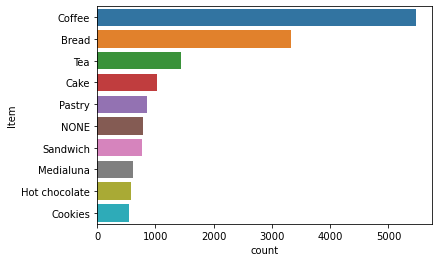

In [19]:
sns.countplot(y = 'Item', data = df, order = df['Item'].value_counts().iloc[:10].index) #Top 10 

In [22]:
 df.groupby(['Transaction','Date','Item','Time']).size().reset_index()

,Transaction,Date,Item,Time,0
0,1,2016-10-30,Bread,09:58:11,1
1,2,2016-10-30,Scandinavian,10:05:34,2
2,3,2016-10-30,Cookies,10:07:57,1
3,3,2016-10-30,Hot chocolate,10:07:57,1
4,3,2016-10-30,Jam,10:07:57,1
...,...,...,...,...,...
19635,9682,2017-04-09,Tacos/Fajita,14:32:58,1
19636,9682,2017-04-09,Tea,14:32:58,1
19637,9683,2017-04-09,Coffee,14:57:06,1
19638,9683,2017-04-09,Pastry,14:57:06,1


In [29]:
df1 = df.groupby(['Transaction','Date','Item','Time']).size().reset_index(name='Total')

In [30]:
df1.head()

,Transaction,Date,Item,Time,Total
0,1,2016-10-30,Bread,09:58:11,1
1,2,2016-10-30,Scandinavian,10:05:34,2
2,3,2016-10-30,Cookies,10:07:57,1
3,3,2016-10-30,Hot chocolate,10:07:57,1
4,3,2016-10-30,Jam,10:07:57,1


In [27]:
df1[df1['Total'] == 3 ]

,Transaction,Date,Item,Time,Total
215,104,2016-10-31,Coffee,10:12:48,3
490,247,2016-11-01,Coffee,16:07:11,3
674,346,2016-11-03,Coffee,08:15:21,3
1259,635,2016-11-05,Coffee,15:53:52,3
4268,2156,2016-11-26,Coffee,16:47:49,3
...,...,...,...,...,...
18714,9244,2017-04-02,Coffee,10:49:32,3
18791,9277,2017-04-02,Coffee,15:26:57,3
18965,9369,2017-04-04,Coffee,12:30:44,3
19245,9493,2017-04-06,Coffee,14:46:07,3


In [28]:
df1.Total.describe()

count    19640.000000
mean         1.084165
std          0.295930
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Total, dtype: float64

From the observations the maximum items took by the customers are 4 items . And the 75% of customers took only 1 item.

In [37]:
menu = (df1.groupby(['Transaction','Date', 'Item' ])['Total'] 
          .sum().unstack().reset_index().fillna(0).set_index(np.arange(0,9531)))
menu.tail()

Item,Transaction,Date,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
9526,9680,2017-04-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9527,9681,2017-04-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9528,9682,2017-04-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9529,9683,2017-04-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9530,9684,2017-04-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.drop(["Time"],inplace = True,axis=1)

##### Time feature is not implimented in this code because it do not give certain kind of information so that we can drop this feature .

In [50]:
menu.shape

(9531, 97)

In [51]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [59]:
menu_sets = menu.iloc[:,2:].applymap(encode_units) 

In [60]:
menu_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
frequent_itemsets = apriori(menu_sets, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
6,0.475081,(Coffee)
2,0.324940,(Bread)
27,0.141643,(Tea)
4,0.103137,(Cake)
35,0.089393,"(Coffee, Bread)"
...,...,...
57,0.010807,"(Coffee, Spanish Brunch)"
33,0.010702,"(Brownie, Bread)"
11,0.010492,(Hearty & Seasonal)
21,0.010387,(Salad)


#### Support of Coffee is highest . The more customers has take the coffee maximum times.

In [55]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules.sort_values(['confidence'], ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
23,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
26,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
22,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
25,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
14,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
28,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


In [56]:
rules.shape

(42, 9)

### Observation :-


There are 4 different states of apriori .
1) Association rule

2) Support 

3) Confidence

4) Lift 

Association rule states that if a customer buying Toast then he will go for Coffee . And it is applied to other 8 things . As he go for antecedents then he gonna get consequents.

Support states that in how proportion he will get antecedent support based on the antecedent . And the proportion of consequent support based on consequents (Coffee) . Based on this both shop owner will calculate total support. It mostly used to see the frequency of itemsets in data. Support  s=(Toast and Coffee) in total  33 transactions

Confidence states that the there should be accurate percentage that the customer will by both antecedents(Toast) and consequents(Coffee) . If customer goes for Toast he will surly buy Coffee. If Customers take coffee then they will take Thost ,Spanish Brunch , Medialuna , asthere are multiple options so the confidence of antecedents with consequents is different and consequents with antecedents is different. Confidence s(Toast and Coffee)/s(Toast) = 70%

Lift is probably used on left side like Coffee . It will see that the customer is going for Coffee then he will also go for the items in antecedent . And it will show the percentage depend on both antecedents and consequents.(Coffee and Toast),etc.
Lift c( 70% )/s(Coffee) = 1.48% . That means if customer takes Coffee then he will go for Toast on 1.48 % chances.

Leverage states the difference and relation between support of antecedents and consequents . 


Conviction states when the given items are not related the value of both antecedents and consequents is 1. As we can see from the above observation antecedent support is is observered without consequent support.

From the observation we can see that the customer prefers coffee whenever they comes to take something . So the bakery owner should keep the Coffee in large amount so that the customer recognize it easily. And he should keep some of the items near Coffee menu so that the sales of other things also increase.The owner also can give Coffee in different varities like Cold coffee with ice cream , Hot chocolate ice cream , etc. This can attract the customers towards the bakery in large amount. 